<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Strato75/Covid-19_ItalyStats/blob/master/notebooks/per_region_stats.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" />Run in Google Colab</a>
  </td>
</table>

In [1]:
%pylab inline
import pandas as pd
from scipy.signal import savgol_filter
import requests
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


def plot_field(groups, sel_regions, field, minval=1, ms = 4):
    for g in groups.groups:

        x_data = ['-'.join(i.split('T')[0].split('-')[1:]) for i in np.datetime_as_string(groups.get_group(g)['data'].values)]  
        data = groups.get_group(g)[field]

        m = max(data)
        if g in sel_regions:
          plot(x_data, data, 'o-', ms=ms, label='%s, max: %d' %(g,m))

    title(field)
    grid()
    xlabel('Date')
    ylabel('#')
    _ = xticks(rotation=90, ha="right")
    legend()


def plot_grad(x_data, raw_data, title_=''):
    grad = np.gradient(raw_data)
    grad_hat = savgol_filter(grad, sliding_win_size, polynomial_fit_degree) 
    plot(x_data, grad_hat, 'o-', ms=ms, label=('Derivative smoothed'))
    plot(x_data, grad, 'o-', ms=ms, label=('Derivative'))
    legend()
    title(title_)
    grid()
    xlabel('Date')
    ylabel('cases per day')
    _ = xticks(rotation=45)

    return grad


def get_df_from_json_url(url):
    response = requests.get(url)
    #print(response.text)
    df = pd.read_json(response.text, orient='records')
    return df

In [3]:
raw_it_region_df = get_df_from_json_url('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json') 
raw_it_region_df['data'] = pd.to_datetime(raw_it_region_df['data'], format='%Y-%m-%d %H:%M:%S')

# Parameters for savgol filter (Smooting curves)
sliding_win_size = 15
polynomial_fit_degree = 3

### Assign the _minval_ variable to set the number of cases a region must have to plot its statistics

In [5]:
minval = 1000 

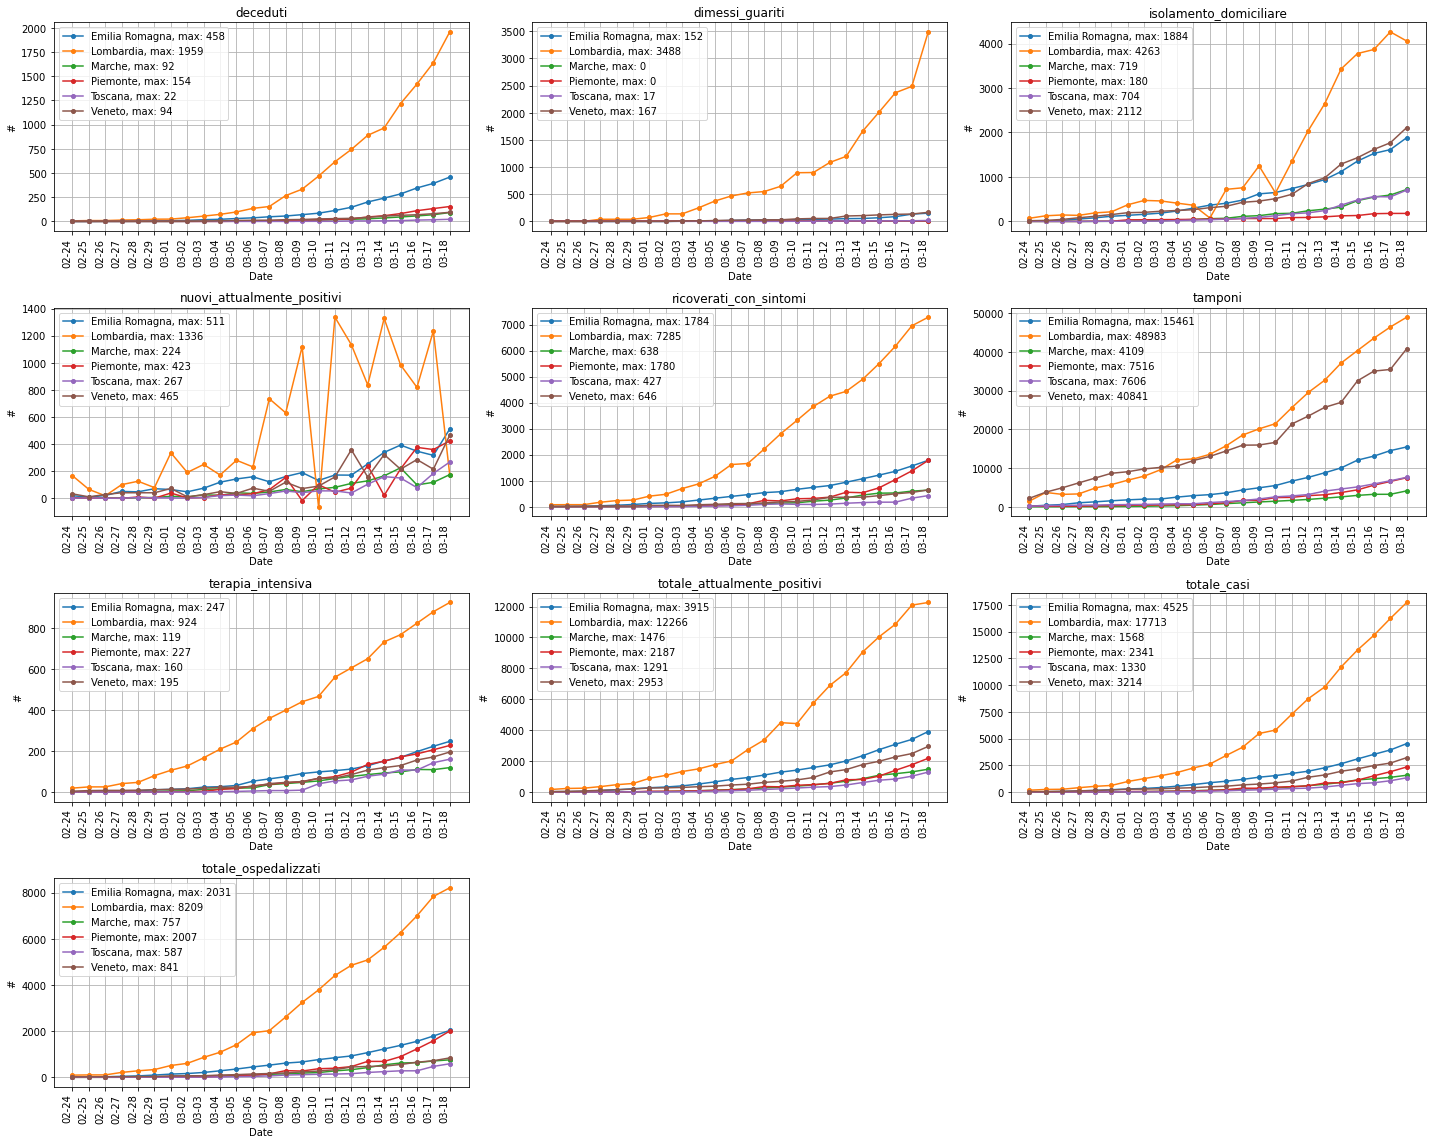

In [6]:
groups_regions = raw_it_region_df.groupby('denominazione_regione')

cols = raw_it_region_df.columns
fields = sorted(cols[6:])
f = figure(figsize=(20,16))

sel_regions = list(raw_it_region_df.loc[raw_it_region_df['totale_casi'] > minval, 'denominazione_regione'].unique())

for index, field in enumerate(fields):
    subplot(4,3,index+1)
    plot_field(groups_regions, sel_regions, field, minval=minval)

tight_layout()
#suptitle('Regioni con più di %d casi totali' % minval)

f.savefig('per_region_stats.png', dpi=300)#